In [47]:
import pandas as pd
import numpy as np

sales = pd.read_csv("sales_data.csv")

# Clean column names
sales.columns = sales.columns.str.strip().str.lower()




In [49]:
sales.head()

,date,product,quantity,price,customer_id,region,total_sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [51]:
sales.info()
sales.describe()
sales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         100 non-null    object
 1   product      100 non-null    object
 2   quantity     100 non-null    int64 
 3   price        100 non-null    int64 
 4   customer_id  100 non-null    object
 5   region       100 non-null    object
 6   total_sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


date           0
product        0
quantity       0
price          0
customer_id    0
region         0
total_sales    0
dtype: int64

In [53]:
sales['date'] = pd.to_datetime(sales['date'])


In [55]:
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day


In [57]:
sales['quantity'] = sales['quantity'].astype(int)
sales['price'] = sales['price'].astype(float)


In [59]:
sales['total_price'] = sales['quantity'] * sales['price']


In [63]:
top_customers = sales.groupby('customer_id')['total_sales'] \
                     .sum().sort_values(ascending=False)

top_customers.head(10)


customer_id
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
CUST084    324144
CUST070    318762
CUST005    318680
CUST065    312564
CUST028    304465
Name: total_sales, dtype: int64

In [65]:
clv = sales.groupby('customer_id')['total_sales'].sum().reset_index()
clv.columns = ['customer_id', 'lifetime_value']

clv.sort_values(by='lifetime_value', ascending=False).head(10)


,customer_id,lifetime_value
15,CUST016,373932
6,CUST007,363870
82,CUST083,350888
72,CUST073,349510
19,CUST020,333992
83,CUST084,324144
69,CUST070,318762
4,CUST005,318680
64,CUST065,312564
27,CUST028,304465


In [67]:
region_customers = sales.groupby('region')['customer_id'].nunique()
region_customers


region
East     19
North    28
South    27
West     26
Name: customer_id, dtype: int64

In [69]:
monthly_sales = sales.groupby('month')['total_sales'].sum()
monthly_sales


month
1    4120524
2    2656050
3    4485006
4    1103468
Name: total_sales, dtype: int64

In [71]:
top_products = sales.groupby('product')['quantity'].sum() \
                    .sort_values(ascending=False)

top_products


product
Laptop        136
Tablet        127
Phone         101
Monitor        66
Headphones     48
Name: quantity, dtype: int32

In [73]:
product_revenue = sales.groupby('product')['total_sales'].sum() \
                        .sort_values(ascending=False)

product_revenue


product
Laptop        3889210
Tablet        2884340
Phone         2859394
Headphones    1384033
Monitor       1348071
Name: total_sales, dtype: int64

In [75]:
pivot_region_month = pd.pivot_table(
    sales,
    values='total_sales',
    index='region',
    columns='month',
    aggfunc='sum'
)

pivot_region_month


month,1,2,3,4
region,,,,
East,792969,746674,844016,135980
North,1726624,640784,1419350,196877
South,1088182,422941,1600314,626415
West,512749,845651,621326,144196


In [77]:
pivot_product_region = pd.pivot_table(
    sales,
    values='quantity',
    index='product',
    columns='region',
    aggfunc='sum'
)

pivot_product_region


region,East,North,South,West
product,,,,
Headphones,15,5,16,12
Laptop,7,54,55,20
Monitor,29,20,1,16
Phone,17,14,46,24
Tablet,26,54,25,22


In [81]:
customer_freq = sales['customer_id'].value_counts()

repeat_customers = customer_freq[customer_freq > 1].count()
total_customers = customer_freq.count()

retention_rate = (repeat_customers / total_customers) * 100
retention_rate


0.0

In [85]:
cross_sell = sales.groupby('customer_id')['product'].apply(list)
cross_sell.head(10)


customer_id
CUST001         [Phone]
CUST002    [Headphones]
CUST003         [Phone]
CUST004    [Headphones]
CUST005        [Laptop]
CUST006        [Laptop]
CUST007        [Laptop]
CUST008        [Laptop]
CUST009        [Tablet]
CUST010        [Laptop]
Name: product, dtype: object

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


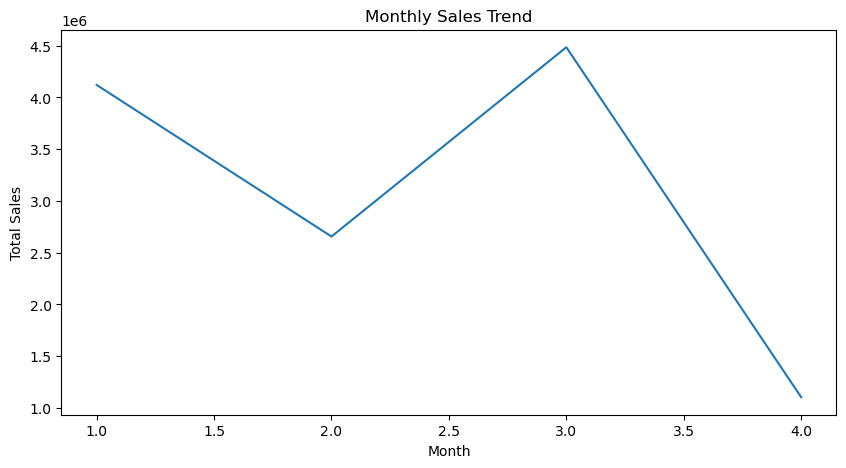

In [89]:
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


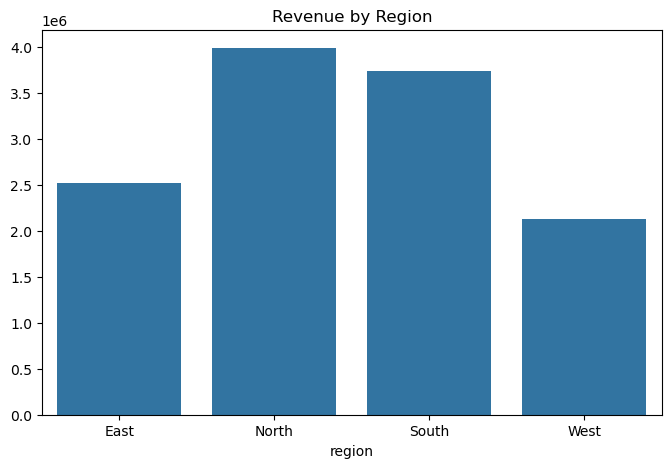

In [91]:
region_sales = sales.groupby('region')['total_sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Revenue by Region")
plt.show()


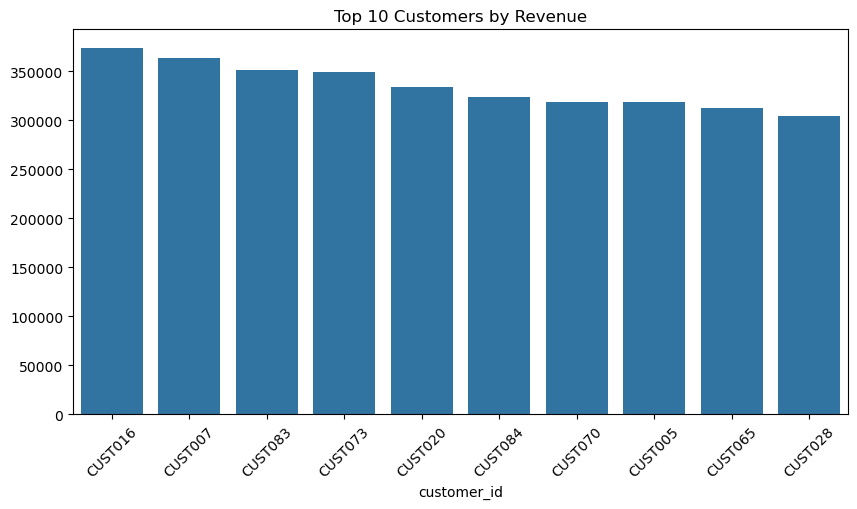

In [93]:
top10 = top_customers.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.show()


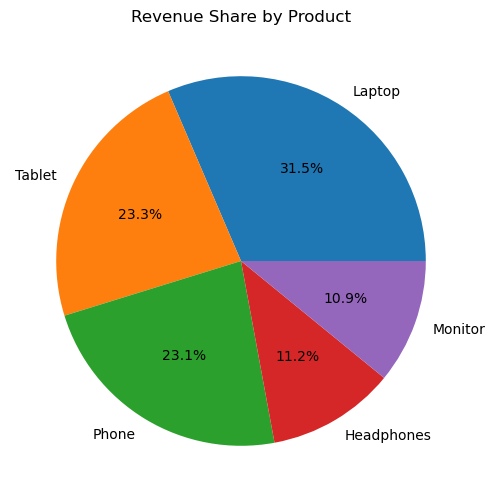

In [95]:
plt.figure(figsize=(6,6))
plt.pie(product_revenue.values, labels=product_revenue.index, autopct='%1.1f%%')
plt.title("Revenue Share by Product")
plt.show()


In [99]:
total_revenue = sales['total_sales'].sum()
total_customers = sales['customer_id'].nunique()
avg_order_value = sales['total_sales'].mean()
top_customer = top_customers.idxmax()
top_customer_value = top_customers.max()

total_revenue, total_customers, avg_order_value, top_customer, top_customer_value


(12365048, 100, 123650.48, 'CUST016', 373932)